In [25]:
import trimesh
import types
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as mp
from mpl_toolkits.mplot3d import axes3d

# 不以科学计数显示
np.set_printoptions(suppress=True)

#x,y,z=np.array(mesh.vertices)[;,0],np.array(mesh.vertices)[;,1],np.array(mesh.vertices)[;,2]

In [93]:
class ICP_3D(object):
    
    
    """"     
    Used packages:
        import numpy as np
        import sympy as sy
        import scipy as sp
    """
    
    
    def __init__(self,fromcloud,fromFEM,femVector):#这是构造方法，当创建类的（实例）对象时，会自动调用，从而实现对类进行初始化操作
        
        self.fromcloud=fromcloud
        self.fromFEM=fromFEM
        self.FEMvector=femVector


    #定义函数
    def get_ICP_3D_SVD(self,targetPoints, sourcePoints,FEMvector):
        '''
        ICP_3D_SVD ICP 配准算法
        '''
        A = self.fromcloud #targetPoints  # A是目标点云（地图值）
        B = self.fromFEM #sourcePoints  # B是源点云（感知值）

        # 均一化点云
        A_mean = np.mean(A, axis=1).reshape((3, 1))
        B_mean = np.mean(B, axis=1).reshape((3, 1))
        A_ = A - A_mean
        B_ = B - B_mean

        # 奇异值SVD分解
        H = np.matmul(B_, A_.T)
        U, _, Vh = np.linalg.svd(H)


        # 计算旋转矩阵Ｒ 和 平移矩阵Ｔ A > B
        R_a2b = np.matmul(U, Vh)
        T_a2b = B_mean - np.matmul(R_a2b, A_mean)

        # 逆变换
        R = R_a2b.T
        T = - np.matmul(R_a2b.T, T_a2b)
        
        #cvvector
        CvVector=np.matmul(self.FEMvector,np.linalg.inv(R.T))+T
        
        return R, T,CvVector
    
# set R AND T
#    R= np.array([[ 0.57882135 -0.26450623 -0.77136392]
#     [-0.81136319 -0.09217294 -0.57722952]
#     [ 0.08158193  0.95996906 -0.26796229]] 
#   T =np.array([[3.40354576]
#       [4.47364088])
#     [0.19911117]]) 


# CV点云（地图上的数据）
a = np.array([[1, 2, 2, 1, 2, 2, 1, 1 ], 
              [1, 1, 1, 1, 4, 4, 4, 4],
              [1, 1, 3, 3, 1, 3, 3, 1]])


# FEM点云
b = np.array([[1,1,1-np.sqrt(2),1-np.sqrt(2),1+0.5*np.sqrt(2),1+0.5*np.sqrt(2),1-1.5*np.sqrt(2),1-1.5*np.sqrt(2)],
             [1,1,1+2*np.sqrt(2),1+2*np.sqrt(2),1+0.5*np.sqrt(2),1+0.5*np.sqrt(2),1+1.5*np.sqrt(2),1+1.5*np.sqrt(2)],
             [3,1,3,1,3,1,3,1]])+np.array([[1],[1],[1]])

#FEM向量
othervector= np.array([[1],[1],[1]])

classforself=ICP_3D(fromcloud=a,fromFEM=b,femVector=othervector)
(R,T,CvVector)=classforself.get_ICP_3D_SVD(a,b,othervector)

print("\nR:\n", R)
print("\nT:\n", T)
print("\nCvVector:\n", CvVector)





ValueError: only 2 non-keyword arguments accepted

In [90]:
# test transformed A
new_A=np.matmul(b.T,np.linalg.inv(R.T)).T+T
print(new_A-a)

[[-0.02140337 -0.69260539 -2.41637503 -1.08757706 -0.32391754  0.00488044
  -2.11386087 -1.78506289]
 [ 8.77437367  6.80158582  8.54187839  6.56909054  5.89062131  3.91783346
   5.42563075  3.45284291]
 [-4.15520918 -4.15520918 -8.9836363  -8.9836363  -4.86231596 -6.86231596
  -8.27652952 -6.27652952]]


In [91]:
# test transformed B
new_B = np.matmul(R.T, a - T)
print(new_B-b)

[[-1.03590476 -0.04951083  1.03590476  0.04951083 -0.75661761 -1.08541559
   0.75661761  1.08541559]
 [ 0.34562014  0.51001913 -0.34562014 -0.51001913 -0.19708765  1.7757002
   0.19708765 -1.7757002 ]
 [ 0.5         2.5         0.5         2.5        -2.5        -0.5
  -2.5        -0.5       ]]


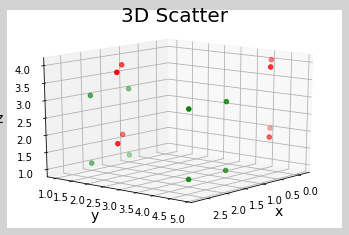

In [92]:
#show A and B in 3Dversion
mp.figure("3D Scatter", facecolor="lightgray")
ax3d = mp.gca(projection="3d")  # 创建三维坐标

mp.title('3D Scatter', fontsize=20)
ax3d.set_xlabel('x', fontsize=14)
ax3d.set_ylabel('y', fontsize=14)
ax3d.set_zlabel('z', fontsize=14)
mp.tick_params(labelsize=10)

#提取xyz坐标
#cv 8points
x1=a[0]
y1=a[1]
z1=a[2]

#FEM 8points
x2=b[0]
y2=b[1]
z2=b[2]

ax3d.scatter(x1, y1, z1,zdir='z', color="g",marker="o")
ax3d.scatter(x2, y2, z2,zdir='z', color="r", marker="o")

# 调整视角
ax3d.view_init(elev=15,    # 仰角
             azim=40   # 方位角
            )
mp.show()